In [1]:
import pandas as pd
import numpy as np
from torch import nn, optim, tensor
import torch
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import disarray
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
train = datasets.MNIST('data', train = True, download = True, transform = transform)
test = datasets.MNIST('data', train = False, download = True, transform = transform)

In [4]:
dataset = torch.utils.data.ConcatDataset([train, test])

In [5]:
split = int(0.67 * len(dataset))
train, test = torch.utils.data.random_split(dataset, [split, len(dataset) - split])

In [6]:
x_train = torch.stack([sample[0] for sample in train]).reshape(-1, 784) 
y_train = torch.tensor([sample[1] for sample in train])
x_test = torch.stack([sample[0] for sample in test]).reshape(-1, 784) 
y_test = torch.tensor([sample[1] for sample in test])

### Models with 2 hidden layers

In [7]:
model1 = nn.Sequential(nn.Linear(784, 150), nn.ReLU(), nn.Linear(150, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model2 = nn.Sequential(nn.Linear(784, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model3 = nn.Sequential(nn.Linear(784, 150), nn.ReLU(), nn.Linear(150, 150), nn.ReLU(), nn.Linear(150, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model4 = nn.Sequential(nn.Linear(784, 150), nn.Sigmoid(), nn.Linear(150, 100), nn.Sigmoid(), nn.Linear(100, 100), nn.Sigmoid(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model5 = nn.Sequential(nn.Linear(784, 100), nn.Sigmoid(), nn.Linear(100, 100), nn.Sigmoid(), nn.Linear(100, 100), nn.Sigmoid(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model6 = nn.Sequential(nn.Linear(784, 150), nn.Sigmoid(), nn.Linear(150, 150), nn.Sigmoid(), nn.Linear(150, 100), nn.Sigmoid(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model7 = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model8 = nn.Sequential(nn.Linear(784, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model9 = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))

### Models with 3 hidden layers

In [8]:
model10 = nn.Sequential(nn.Linear(784, 150), nn.ReLU(), nn.Linear(150, 150), nn.ReLU(), nn.Linear(150, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model11 = nn.Sequential(nn.Linear(784, 150), nn.ReLU(), nn.Linear(150, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model12 = nn.Sequential(nn.Linear(784, 150), nn.ReLU(), nn.Linear(150, 150), nn.ReLU(), nn.Linear(150, 150), nn.ReLU(), nn.Linear(150, 100), nn.ReLU(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model13 = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model14 = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
model15 = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))

### List of all models

In [9]:
allModels = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15]

### Function to train the model, returns a dataFrame with epoch vs Loss

In [10]:
def training(model, optimizerType, trainloader, iter):
    if (optimizerType == "SGD"):
        optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
    else:
        optimizer = optim.Adam(model.parameters(), lr = 0.01)
    
    lossFunction = nn.NLLLoss()

    df = pd.DataFrame(columns = ["Iteration", "Negative Log Likelihood Loss"])

    for i in range(iter):
        currentLoss = 0
        model.train()
        for img, label in trainloader:
            optimizer.zero_grad()
            output = model(img)
            loss = lossFunction(output, label)
            loss.backward()
            optimizer.step()
            currentLoss += loss.item()
        df.loc[len(df.index)] = [i + 1, currentLoss / len(trainloader)]
    
    return df

In [11]:
allLossVsIter = []

In [12]:
trainloader = torch.utils.data.DataLoader(list(zip(x_train, y_train)), shuffle = True, batch_size = 100)
testloader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), shuffle=True, batch_size=100)

In [13]:
for x in allModels:
    allLossVsIter.append(training(x, "SGD", trainloader, 20))

In [14]:
def testing(model, testloader):
    match = 0
    yPred = []
    yActual = []
    for img, label in testloader:   
        for i in range(len(label)):
            image = img[i].reshape([1, 784])
            with torch.no_grad():
                out = model(image)

            probability = list(out.numpy()[0])
            prediction = probability.index(max(probability))
            y = label.numpy()[i]

            if (y == prediction):
                match += 1
            yPred.append(prediction)
            yActual.append(y)

    confusionMatrix = confusion_matrix(yActual, yPred)

    return [(match / len(testloader)), confusionMatrix]

In [17]:
accuracies = pd.DataFrame(columns = ["Model", "Accuracy"])
confusionMatrices = []
metrics = []
for i in range(len(allModels)):
    results = testing(allModels[i], testloader)
    confusionMatrices.append(results[1])
    df_metric = pd.DataFrame(results[1], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    metrics.append(df_metric)
    accuracies.loc[len(accuracies.index)] = [i + 1, results[0]]

In [18]:
allLossVsIter[0]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.708528
1,2.0,0.238454
2,3.0,0.168156
3,4.0,0.132687
4,5.0,0.106993
5,6.0,0.095333
6,7.0,0.083562
7,8.0,0.068795
8,9.0,0.062018
9,10.0,0.053818


In [19]:
allLossVsIter[1]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.741430
1,2.0,0.259079
2,3.0,0.189084
3,4.0,0.145853
4,5.0,0.124127
5,6.0,0.111000
6,7.0,0.095416
7,8.0,0.083964
8,9.0,0.075928
9,10.0,0.064053


In [20]:
allLossVsIter[2]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.697582
1,2.0,0.237787
2,3.0,0.171835
3,4.0,0.132808
4,5.0,0.115475
5,6.0,0.094322
6,7.0,0.080928
7,8.0,0.069078
8,9.0,0.062502
9,10.0,0.053258


In [21]:
allLossVsIter[3]

,Iteration,Negative Log Likelihood Loss
0,1.0,2.306806
1,2.0,2.301389
2,3.0,2.267038
3,4.0,1.833403
4,5.0,1.248206
5,6.0,0.871361
6,7.0,0.626305
7,8.0,0.512801
8,9.0,0.447994
9,10.0,0.397051


In [22]:
allLossVsIter[4]

,Iteration,Negative Log Likelihood Loss
0,1.0,2.306374
1,2.0,2.300771
2,3.0,2.265243
3,4.0,1.831515
4,5.0,1.215339
5,6.0,0.783940
6,7.0,0.592538
7,8.0,0.480316
8,9.0,0.408009
9,10.0,0.354502


In [23]:
allLossVsIter[5]

,Iteration,Negative Log Likelihood Loss
0,1.0,2.306598
1,2.0,2.301077
2,3.0,2.279161
3,4.0,1.873213
4,5.0,1.167195
5,6.0,0.730944
6,7.0,0.569769
7,8.0,0.477963
8,9.0,0.416672
9,10.0,0.371411


In [24]:
allLossVsIter[6]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.590788
1,2.0,0.226323
2,3.0,0.163792
3,4.0,0.127013
4,5.0,0.106934
5,6.0,0.092667
6,7.0,0.076789
7,8.0,0.069309
8,9.0,0.059511
9,10.0,0.050742


In [25]:
allLossVsIter[7]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.598935
1,2.0,0.219994
2,3.0,0.163907
3,4.0,0.127501
4,5.0,0.106964
5,6.0,0.093893
6,7.0,0.082938
7,8.0,0.071894
8,9.0,0.062467
9,10.0,0.056559


In [26]:
allLossVsIter[8]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.595344
1,2.0,0.232277
2,3.0,0.166638
3,4.0,0.129076
4,5.0,0.107314
5,6.0,0.092046
6,7.0,0.080668
7,8.0,0.067763
8,9.0,0.061806
9,10.0,0.054187


In [27]:
allLossVsIter[9]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.984034
1,2.0,0.259100
2,3.0,0.174848
3,4.0,0.142292
4,5.0,0.113654
5,6.0,0.094979
6,7.0,0.084385
7,8.0,0.072675
8,9.0,0.063484
9,10.0,0.059556


In [28]:
allLossVsIter[10]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.975762
1,2.0,0.265511
2,3.0,0.175736
3,4.0,0.144029
4,5.0,0.115964
5,6.0,0.099260
6,7.0,0.087248
7,8.0,0.077980
8,9.0,0.066017
9,10.0,0.060265


In [29]:
allLossVsIter[11]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.937289
1,2.0,0.246621
2,3.0,0.168189
3,4.0,0.135232
4,5.0,0.110655
5,6.0,0.093326
6,7.0,0.082256
7,8.0,0.072854
8,9.0,0.062502
9,10.0,0.057018


In [30]:
allLossVsIter[12]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.693085
1,2.0,0.224845
2,3.0,0.160316
3,4.0,0.125108
4,5.0,0.102741
5,6.0,0.086667
6,7.0,0.078081
7,8.0,0.064773
8,9.0,0.058784
9,10.0,0.055097


In [31]:
allLossVsIter[13]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.727833
1,2.0,0.236776
2,3.0,0.164441
3,4.0,0.134180
4,5.0,0.109331
5,6.0,0.090924
6,7.0,0.078486
7,8.0,0.072188
8,9.0,0.061269
9,10.0,0.051680


In [32]:
allLossVsIter[14]

,Iteration,Negative Log Likelihood Loss
0,1.0,0.671529
1,2.0,0.237718
2,3.0,0.162214
3,4.0,0.133701
4,5.0,0.111978
5,6.0,0.093403
6,7.0,0.076502
7,8.0,0.069232
8,9.0,0.060096
9,10.0,0.052698


In [53]:
accuracies

,Model,Accuracy
0,1.0,97.519481
1,2.0,97.562771
2,3.0,97.415584
3,4.0,95.129870
4,5.0,94.688312
5,6.0,95.467532
6,7.0,97.095238
7,8.0,97.493506
8,9.0,97.480519
9,10.0,97.515152


In [34]:
def plotter(df):
    plt.xlabel("Iteration")
    plt.ylabel("Negative Log Likelihood Loss")
    x = list(df['Iteration'].values)
    y = list(df['Negative Log Likelihood Loss'].values)
    plt.plot(x, y)

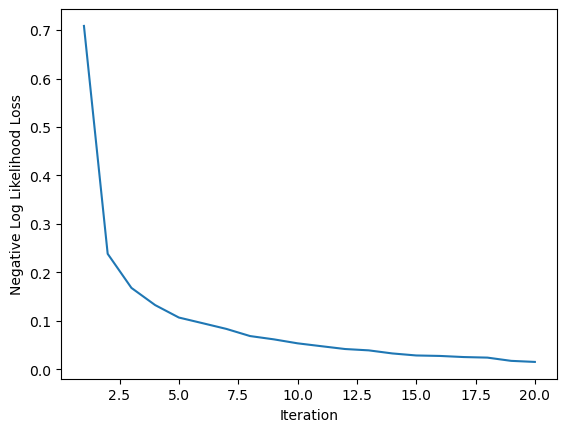

In [35]:
plotter(allLossVsIter[0])

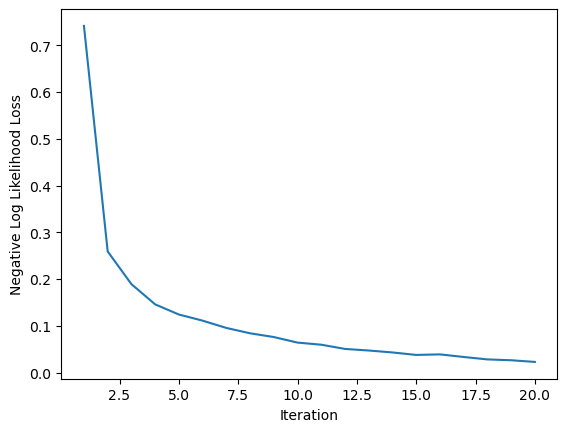

In [36]:
plotter(allLossVsIter[1])

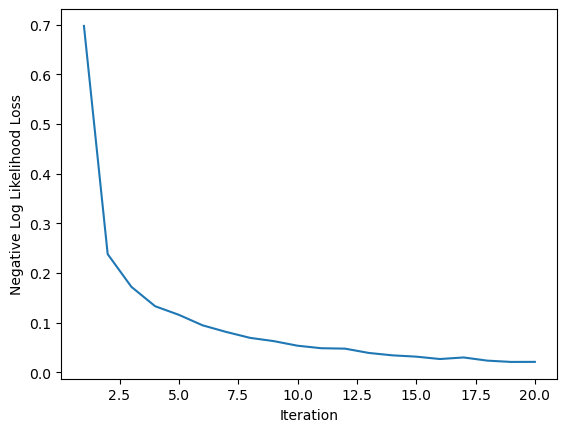

In [37]:
plotter(allLossVsIter[2])

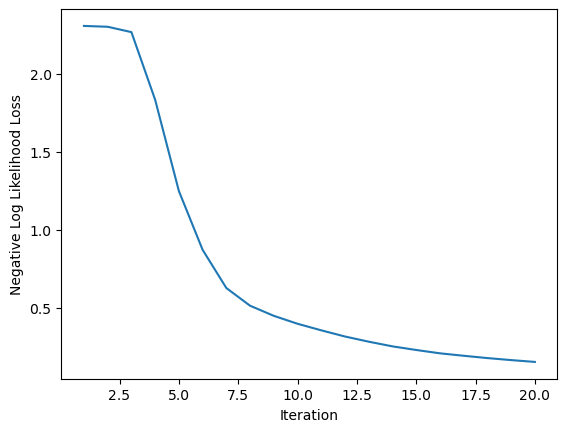

In [38]:
plotter(allLossVsIter[3])

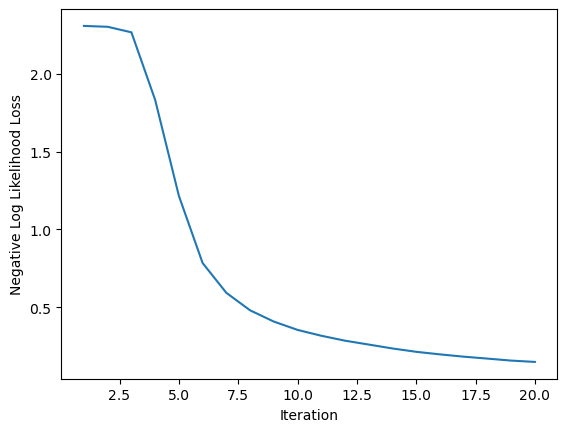

In [39]:
plotter(allLossVsIter[4])

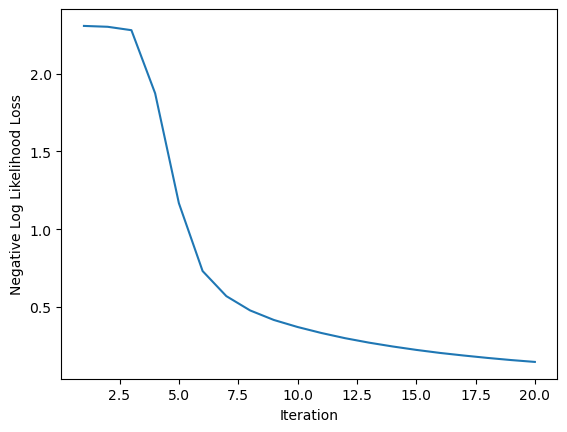

In [40]:
plotter(allLossVsIter[5])

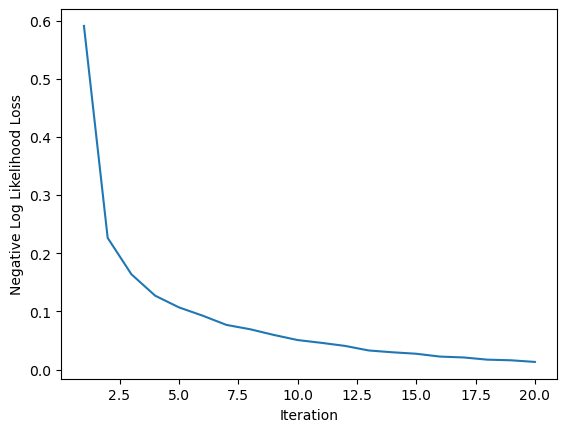

In [41]:
plotter(allLossVsIter[6])

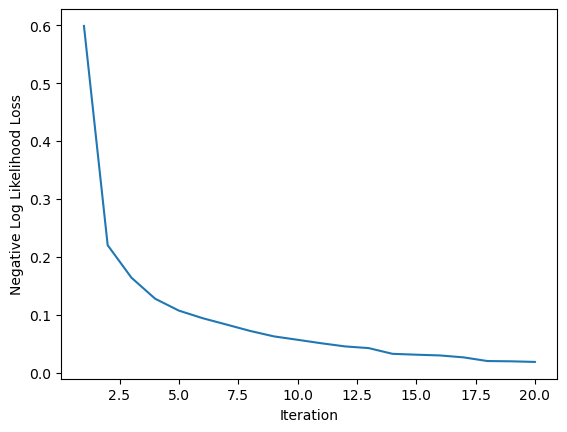

In [42]:
plotter(allLossVsIter[7])

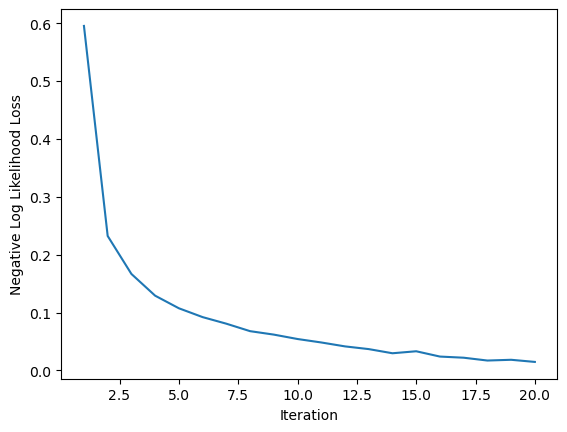

In [43]:
plotter(allLossVsIter[8])

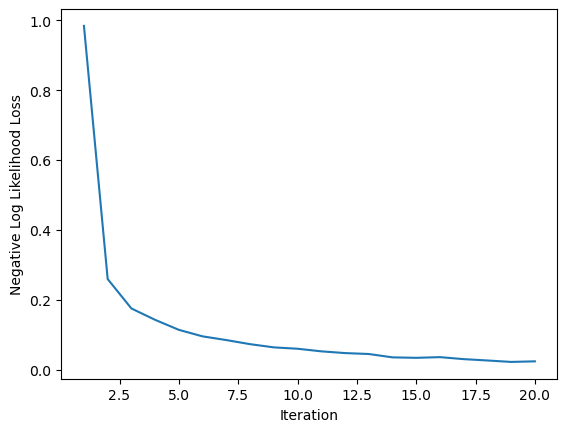

In [44]:
plotter(allLossVsIter[9])

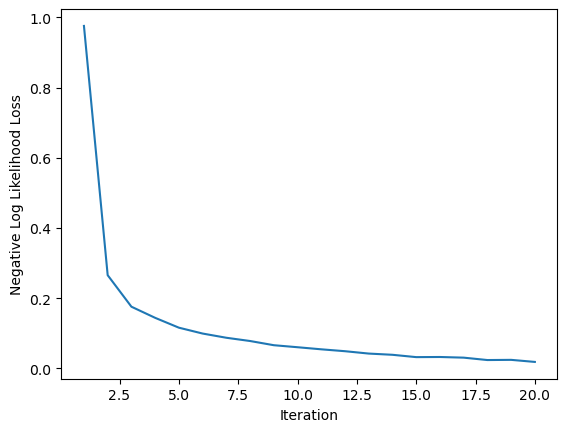

In [45]:
plotter(allLossVsIter[10])

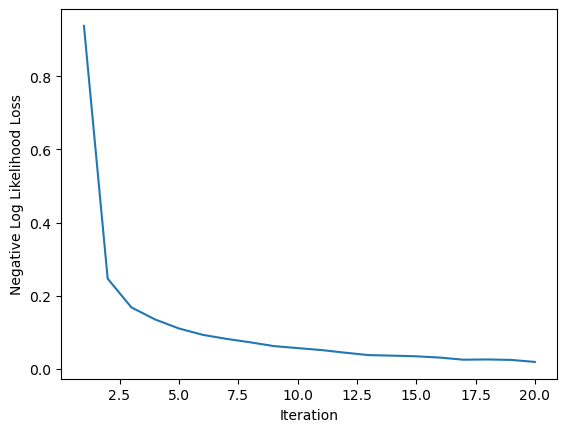

In [46]:
plotter(allLossVsIter[11])

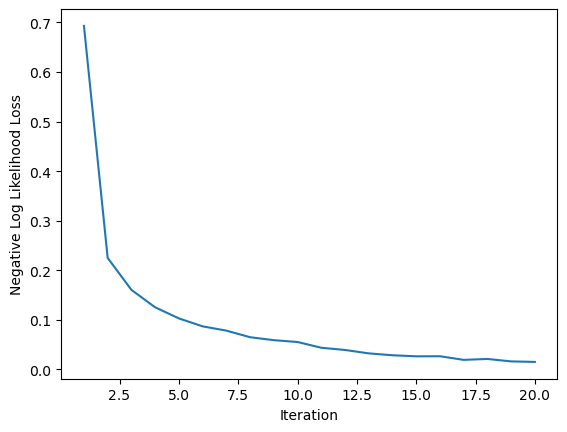

In [47]:
plotter(allLossVsIter[12])

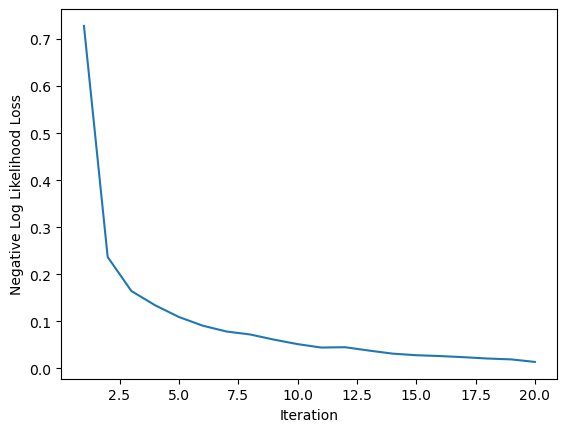

In [48]:
plotter(allLossVsIter[13])

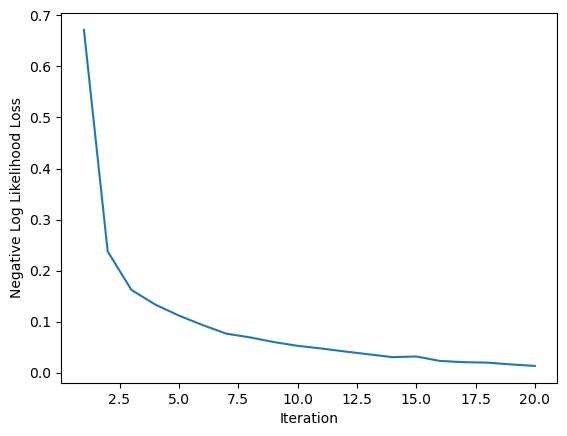

In [49]:
plotter(allLossVsIter[14])

In [54]:
metrics[0].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997186,0.996494,0.994286,0.993680,0.995065,0.994848,0.996190,0.995065,0.994199,0.993377,0.995039
f1,0.985324,0.984480,0.971795,0.968976,0.975683,0.971538,0.980727,0.975817,0.970235,0.966113,0.975195
false_discovery_rate,0.007279,0.022451,0.028620,0.020198,0.031343,0.016941,0.029055,0.029126,0.033628,0.028075,0.024805
false_negative_rate,0.021963,0.008491,0.027790,0.041614,0.017190,0.039716,0.009292,0.019190,0.025870,0.039630,0.024805
false_positive_rate,0.000767,0.002877,0.003227,0.002268,0.003562,0.001668,0.003215,0.003325,0.003644,0.003025,0.002756
negative_predictive_value,0.997656,0.998925,0.996869,0.995234,0.998071,0.996006,0.998990,0.997829,0.997217,0.995685,0.997244
positive_predictive_value,0.992721,0.977549,0.971380,0.979802,0.968657,0.983059,0.970945,0.970874,0.966372,0.971925,0.975195
precision,0.992721,0.977549,0.971380,0.979802,0.968657,0.983059,0.970945,0.970874,0.966372,0.971925,0.975195
recall,0.978037,0.991509,0.972210,0.958386,0.982810,0.960284,0.990708,0.980810,0.974130,0.960370,0.975195
sensitivity,0.978037,0.991509,0.972210,0.958386,0.982810,0.960284,0.990708,0.980810,0.974130,0.960370,0.975195


In [55]:
metrics[1].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996970,0.997316,0.994762,0.993074,0.995498,0.994719,0.997013,0.995238,0.993506,0.993160,0.995126
f1,0.984163,0.988008,0.973917,0.966569,0.977528,0.971104,0.984818,0.976685,0.966770,0.965336,0.975628
false_discovery_rate,0.006396,0.009694,0.017826,0.039053,0.016949,0.027053,0.020569,0.029077,0.039613,0.038041,0.024372
false_negative_rate,0.025101,0.014280,0.034203,0.027743,0.027933,0.030733,0.009735,0.017484,0.026762,0.031264,0.024372
false_positive_rate,0.000671,0.001219,0.001975,0.004536,0.001877,0.002716,0.002255,0.003325,0.004315,0.004177,0.002708
negative_predictive_value,0.997322,0.998197,0.996154,0.996811,0.996875,0.996904,0.998943,0.998022,0.997119,0.996589,0.997292
positive_predictive_value,0.993604,0.990306,0.982174,0.960947,0.983051,0.972947,0.979431,0.970923,0.960387,0.961959,0.975628
precision,0.993604,0.990306,0.982174,0.960947,0.983051,0.972947,0.979431,0.970923,0.960387,0.961959,0.975628
recall,0.974899,0.985720,0.965797,0.972257,0.972067,0.969267,0.990265,0.982516,0.973238,0.968736,0.975628
sensitivity,0.974899,0.985720,0.965797,0.972257,0.972067,0.969267,0.990265,0.982516,0.973238,0.968736,0.975628


In [56]:
metrics[2].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997186,0.997100,0.993636,0.992987,0.994892,0.995065,0.997100,0.994935,0.992944,0.992468,0.994831
f1,0.985397,0.987133,0.967981,0.966180,0.974337,0.973075,0.985088,0.975259,0.963624,0.962387,0.974156
false_discovery_rate,0.012162,0.017584,0.013321,0.040232,0.013650,0.027843,0.008957,0.032718,0.035730,0.054777,0.025844
false_negative_rate,0.017033,0.008105,0.050021,0.027322,0.037387,0.026005,0.020796,0.016631,0.037021,0.019815,0.025844
false_positive_rate,0.001294,0.002243,0.001445,0.004681,0.001492,0.002812,0.000960,0.003758,0.003835,0.006193,0.002872
negative_predictive_value,0.998180,0.998975,0.994388,0.996858,0.995823,0.997379,0.997748,0.998117,0.996021,0.997831,0.997128
positive_predictive_value,0.987838,0.982416,0.986679,0.959768,0.986350,0.972157,0.991043,0.967282,0.964270,0.945223,0.974156
precision,0.987838,0.982416,0.986679,0.959768,0.986350,0.972157,0.991043,0.967282,0.964270,0.945223,0.974156
recall,0.982967,0.991895,0.949979,0.972678,0.962613,0.973995,0.979204,0.983369,0.962979,0.980185,0.974156
sensitivity,0.982967,0.991895,0.949979,0.972678,0.962613,0.973995,0.979204,0.983369,0.962979,0.980185,0.974156


In [57]:
metrics[3].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.995152,0.994242,0.990779,0.988528,0.990346,0.987056,0.994199,0.990952,0.986883,0.984459,0.990260
f1,0.974729,0.974290,0.953786,0.943557,0.951929,0.930449,0.970524,0.954850,0.932652,0.923274,0.951299
false_discovery_rate,0.018628,0.024012,0.031718,0.043610,0.044983,0.084249,0.034996,0.032399,0.070447,0.102990,0.048701
false_negative_rate,0.031824,0.027403,0.060282,0.068937,0.051139,0.054374,0.023894,0.057569,0.064228,0.048877,0.048701
false_positive_rate,0.001965,0.003023,0.003468,0.004874,0.005006,0.008768,0.003839,0.003565,0.007623,0.011906,0.005411
negative_predictive_value,0.996603,0.996540,0.993231,0.992109,0.994276,0.994502,0.997406,0.993515,0.993091,0.994636,0.994589
positive_predictive_value,0.981372,0.975988,0.968282,0.956390,0.955017,0.915751,0.965004,0.967601,0.929553,0.897010,0.951299
precision,0.981372,0.975988,0.968282,0.956390,0.955017,0.915751,0.965004,0.967601,0.929553,0.897010,0.951299
recall,0.968176,0.972597,0.939718,0.931063,0.948861,0.945626,0.976106,0.942431,0.935772,0.951123,0.951299
sensitivity,0.968176,0.972597,0.939718,0.931063,0.948861,0.945626,0.976106,0.942431,0.935772,0.951123,0.951299


In [58]:
metrics[4].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.994805,0.993420,0.988831,0.987100,0.988182,0.985238,0.993810,0.990996,0.986797,0.984589,0.989377
f1,0.972640,0.970904,0.944204,0.938174,0.939642,0.918088,0.968073,0.956376,0.932775,0.923867,0.946883
false_discovery_rate,0.010209,0.036840,0.044639,0.073740,0.032332,0.066895,0.022983,0.059018,0.077996,0.101871,0.053117
false_negative_rate,0.043926,0.021227,0.066695,0.049601,0.086807,0.096454,0.040708,0.027719,0.056200,0.048877,0.053117
false_positive_rate,0.001054,0.004730,0.004913,0.008687,0.003418,0.006528,0.002447,0.006890,0.008582,0.011762,0.005902
negative_predictive_value,0.995321,0.997313,0.992505,0.994288,0.990337,0.990310,0.995594,0.996856,0.993944,0.994636,0.994098
positive_predictive_value,0.989791,0.963160,0.955361,0.926260,0.967668,0.933105,0.977017,0.940982,0.922004,0.898129,0.946883
precision,0.989791,0.963160,0.955361,0.926260,0.967668,0.933105,0.977017,0.940982,0.922004,0.898129,0.946883
recall,0.956074,0.978773,0.933305,0.950399,0.913193,0.903546,0.959292,0.972281,0.943800,0.951123,0.946883
sensitivity,0.956074,0.978773,0.933305,0.950399,0.913193,0.903546,0.959292,0.972281,0.943800,0.951123,0.946883


In [59]:
metrics[5].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.994762,0.994372,0.991126,0.988095,0.991861,0.988009,0.994675,0.992078,0.986840,0.987532,0.990935
f1,0.972556,0.974961,0.956037,0.942142,0.959483,0.933653,0.972961,0.960415,0.934228,0.937035,0.954675
false_discovery_rate,0.015611,0.026913,0.040878,0.056866,0.037613,0.053883,0.033202,0.025461,0.092857,0.069475,0.045325
false_negative_rate,0.038996,0.023157,0.047029,0.058848,0.043404,0.078487,0.020796,0.053305,0.037021,0.056363,0.045325
false_positive_rate,0.001629,0.003413,0.004576,0.006515,0.004188,0.005289,0.003647,0.002795,0.010595,0.007682,0.005036
negative_predictive_value,0.995842,0.997073,0.994705,0.993245,0.995141,0.992110,0.997742,0.993997,0.995994,0.993845,0.994964
positive_predictive_value,0.984389,0.973087,0.959122,0.943134,0.962387,0.946117,0.966798,0.974539,0.907143,0.930525,0.954675
precision,0.984389,0.973087,0.959122,0.943134,0.962387,0.946117,0.966798,0.974539,0.907143,0.930525,0.954675
recall,0.961004,0.976843,0.952971,0.941152,0.956596,0.921513,0.979204,0.946695,0.962979,0.943637,0.954675
sensitivity,0.961004,0.976843,0.952971,0.941152,0.956596,0.921513,0.979204,0.946695,0.962979,0.943637,0.954675


In [60]:
metrics[6].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996883,0.997100,0.994675,0.993506,0.992554,0.994156,0.996926,0.994329,0.994026,0.987749,0.994190
f1,0.983864,0.987093,0.973520,0.967894,0.961964,0.968198,0.984413,0.971882,0.969224,0.940609,0.970952
false_discovery_rate,0.016136,0.014615,0.019514,0.013956,0.009112,0.035211,0.023094,0.021608,0.030776,0.101443,0.029048
false_negative_rate,0.016136,0.011193,0.033348,0.049601,0.065320,0.028369,0.007965,0.034542,0.030776,0.013210,0.029048
false_positive_rate,0.001725,0.001853,0.002168,0.001544,0.000963,0.003574,0.002543,0.002409,0.003308,0.012147,0.003228
negative_predictive_value,0.998275,0.998585,0.996249,0.994329,0.992729,0.997139,0.999135,0.996103,0.996692,0.998544,0.996772
positive_predictive_value,0.983864,0.985385,0.980486,0.986044,0.990888,0.964789,0.976906,0.978392,0.969224,0.898557,0.970952
precision,0.983864,0.985385,0.980486,0.986044,0.990888,0.964789,0.976906,0.978392,0.969224,0.898557,0.970952
recall,0.983864,0.988807,0.966652,0.950399,0.934680,0.971631,0.992035,0.965458,0.969224,0.986790,0.970952
sensitivity,0.983864,0.988807,0.966652,0.950399,0.934680,0.971631,0.992035,0.965458,0.969224,0.986790,0.970952


In [61]:
metrics[7].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996450,0.996667,0.994848,0.993550,0.995195,0.994372,0.997143,0.995022,0.993377,0.993247,0.994987
f1,0.981565,0.985178,0.974524,0.968264,0.976307,0.969180,0.985443,0.975641,0.965901,0.965684,0.974935
false_discovery_rate,0.015336,0.017281,0.024014,0.018566,0.030110,0.028055,0.017590,0.030724,0.034744,0.035165,0.025065
false_negative_rate,0.021515,0.012350,0.026935,0.044557,0.017190,0.033570,0.011504,0.017910,0.033452,0.033465,0.025065
false_positive_rate,0.001629,0.002194,0.002697,0.002075,0.003418,0.002812,0.001919,0.003517,0.003740,0.003841,0.002785
negative_predictive_value,0.997701,0.998439,0.996966,0.994900,0.998072,0.996619,0.998752,0.997973,0.996404,0.996351,0.997215
positive_predictive_value,0.984664,0.982719,0.975986,0.981434,0.969890,0.971945,0.982410,0.969276,0.965256,0.964835,0.974935
precision,0.984664,0.982719,0.975986,0.981434,0.969890,0.971945,0.982410,0.969276,0.965256,0.964835,0.974935
recall,0.978485,0.987650,0.973065,0.955443,0.982810,0.966430,0.988496,0.982090,0.966548,0.966535,0.974935
sensitivity,0.978485,0.987650,0.973065,0.955443,0.982810,0.966430,0.988496,0.982090,0.966548,0.966535,0.974935


In [62]:
metrics[8].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996364,0.997749,0.994632,0.993420,0.995541,0.993160,0.996450,0.995108,0.993810,0.993377,0.994961
f1,0.981047,0.989942,0.973368,0.967535,0.977996,0.963460,0.981922,0.976024,0.967887,0.966396,0.974805
false_discovery_rate,0.012267,0.007755,0.022011,0.016500,0.027613,0.057039,0.021529,0.028716,0.025328,0.035933,0.025195
false_negative_rate,0.025549,0.012350,0.031210,0.047919,0.016330,0.015130,0.014602,0.019190,0.038805,0.031264,0.025195
false_positive_rate,0.001294,0.000975,0.002457,0.001834,0.003129,0.006004,0.002351,0.003276,0.002685,0.003937,0.002799
negative_predictive_value,0.997273,0.998441,0.996488,0.994518,0.998168,0.998468,0.998415,0.997829,0.995835,0.996589,0.997201
positive_predictive_value,0.987733,0.992245,0.977989,0.983500,0.972387,0.942961,0.978471,0.971284,0.974672,0.964067,0.974805
precision,0.987733,0.992245,0.977989,0.983500,0.972387,0.942961,0.978471,0.971284,0.974672,0.964067,0.974805
recall,0.974451,0.987650,0.968790,0.952081,0.983670,0.984870,0.985398,0.980810,0.961195,0.968736,0.974805
sensitivity,0.974451,0.987650,0.968790,0.952081,0.983670,0.984870,0.985398,0.980810,0.961195,0.968736,0.974805


In [63]:
metrics[9].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997143,0.996797,0.994762,0.994416,0.995325,0.994459,0.996797,0.995671,0.991861,0.993074,0.995030
f1,0.985122,0.985731,0.973939,0.972687,0.976734,0.969422,0.983599,0.978687,0.959148,0.965050,0.975152
false_discovery_rate,0.009070,0.015029,0.018663,0.020051,0.020734,0.020280,0.014654,0.021730,0.064831,0.042479,0.024848
false_negative_rate,0.020619,0.013508,0.033348,0.034468,0.025784,0.040662,0.018142,0.020896,0.015611,0.027301,0.024848
false_positive_rate,0.000958,0.001902,0.002071,0.002268,0.002311,0.002001,0.001583,0.002457,0.007335,0.004705,0.002761
negative_predictive_value,0.997799,0.998293,0.996249,0.996049,0.997113,0.995910,0.998033,0.997639,0.998312,0.997018,0.997239
positive_predictive_value,0.990930,0.984971,0.981337,0.979949,0.979266,0.979720,0.985346,0.978270,0.935169,0.957521,0.975152
precision,0.990930,0.984971,0.981337,0.979949,0.979266,0.979720,0.985346,0.978270,0.935169,0.957521,0.975152
recall,0.979381,0.986492,0.966652,0.965532,0.974216,0.959338,0.981858,0.979104,0.984389,0.972699,0.975152
sensitivity,0.979381,0.986492,0.966652,0.965532,0.974216,0.959338,0.981858,0.979104,0.984389,0.972699,0.975152


In [64]:
metrics[10].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997316,0.997143,0.994416,0.993203,0.994978,0.994286,0.997619,0.993636,0.994113,0.992554,0.994926
f1,0.986142,0.987214,0.972465,0.966772,0.974815,0.968883,0.987813,0.969279,0.969710,0.961930,0.974632
false_discovery_rate,0.016496,0.008946,0.028986,0.026428,0.014919,0.033850,0.010652,0.049590,0.031584,0.032933,0.025368
false_negative_rate,0.011206,0.016596,0.026080,0.039933,0.035239,0.028369,0.013717,0.011087,0.028992,0.043153,0.025368
false_positive_rate,0.001773,0.001121,0.003275,0.002992,0.001637,0.003431,0.001152,0.005830,0.003404,0.003553,0.002819
negative_predictive_value,0.998801,0.997905,0.997061,0.995423,0.996062,0.997139,0.998513,0.998742,0.996883,0.995300,0.997181
positive_predictive_value,0.983504,0.991054,0.971014,0.973572,0.985081,0.966150,0.989348,0.950410,0.968416,0.967067,0.974632
precision,0.983504,0.991054,0.971014,0.973572,0.985081,0.966150,0.989348,0.950410,0.968416,0.967067,0.974632
recall,0.988794,0.983404,0.973920,0.960067,0.964761,0.971631,0.986283,0.988913,0.971008,0.956847,0.974632
sensitivity,0.988794,0.983404,0.973920,0.960067,0.964761,0.971631,0.986283,0.988913,0.971008,0.956847,0.974632


In [65]:
metrics[11].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996926,0.996450,0.994329,0.993550,0.995455,0.994113,0.996623,0.995065,0.994372,0.993074,0.994996
f1,0.983984,0.984237,0.972074,0.968237,0.977444,0.968150,0.982842,0.976000,0.971047,0.964222,0.974978
false_discovery_rate,0.009537,0.019533,0.030612,0.017734,0.022766,0.040835,0.022747,0.036175,0.030249,0.020445,0.025022
false_negative_rate,0.022411,0.011964,0.025224,0.045397,0.022346,0.022695,0.011504,0.011514,0.027654,0.050638,0.025022
false_positive_rate,0.001006,0.002487,0.003468,0.001979,0.002551,0.004193,0.002495,0.004192,0.003260,0.002160,0.002780
negative_predictive_value,0.997607,0.998487,0.997156,0.994805,0.997497,0.997708,0.998751,0.998695,0.997027,0.994497,0.997220
positive_predictive_value,0.990463,0.980467,0.969388,0.982266,0.977234,0.959165,0.977253,0.963825,0.969751,0.979555,0.974978
precision,0.990463,0.980467,0.969388,0.982266,0.977234,0.959165,0.977253,0.963825,0.969751,0.979555,0.974978
recall,0.977589,0.988036,0.974776,0.954603,0.977654,0.977305,0.988496,0.988486,0.972346,0.949362,0.974978
sensitivity,0.977589,0.988036,0.974776,0.954603,0.977654,0.977305,0.988496,0.988486,0.972346,0.949362,0.974978


In [66]:
metrics[12].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996840,0.997706,0.994762,0.993853,0.995411,0.994545,0.996926,0.995368,0.993723,0.992900,0.995203
f1,0.983592,0.989731,0.973849,0.970168,0.976926,0.970199,0.984344,0.977249,0.967998,0.964441,0.976017
false_discovery_rate,0.013526,0.006226,0.015297,0.030239,0.010146,0.029342,0.018901,0.025445,0.041940,0.049979,0.023983
false_negative_rate,0.019274,0.014280,0.036768,0.029424,0.035668,0.030260,0.012389,0.020043,0.021855,0.020696,0.023983
false_positive_rate,0.001438,0.000780,0.001686,0.003475,0.001107,0.002954,0.002063,0.002891,0.004603,0.005617,0.002665
negative_predictive_value,0.997941,0.998198,0.995868,0.996621,0.996016,0.996950,0.998655,0.997734,0.997645,0.997736,0.997335
positive_predictive_value,0.986474,0.993774,0.984703,0.969761,0.989854,0.970658,0.981099,0.974555,0.958060,0.950021,0.976017
precision,0.986474,0.993774,0.984703,0.969761,0.989854,0.970658,0.981099,0.974555,0.958060,0.950021,0.976017
recall,0.980726,0.985720,0.963232,0.970576,0.964332,0.969740,0.987611,0.979957,0.978145,0.979304,0.976017
sensitivity,0.980726,0.985720,0.963232,0.970576,0.964332,0.969740,0.987611,0.979957,0.978145,0.979304,0.976017


In [67]:
metrics[13].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996840,0.997359,0.994545,0.991991,0.995758,0.991991,0.997100,0.995714,0.993766,0.993333,0.994840
f1,0.983673,0.988208,0.972632,0.960138,0.978879,0.957501,0.985265,0.978887,0.968000,0.966390,0.974199
false_discovery_rate,0.018304,0.010070,0.011479,0.015031,0.018158,0.068811,0.020551,0.020904,0.035430,0.041973,0.025801
false_negative_rate,0.014343,0.013508,0.042753,0.063472,0.024065,0.014657,0.008850,0.021322,0.028546,0.025099,0.025801
false_positive_rate,0.001965,0.001268,0.001252,0.001641,0.002022,0.007339,0.002255,0.002361,0.003835,0.004657,0.002867
negative_predictive_value,0.998466,0.998294,0.995200,0.992754,0.997306,0.998514,0.999039,0.997591,0.996929,0.997258,0.997133
positive_predictive_value,0.981696,0.989930,0.988521,0.984969,0.981842,0.931189,0.979449,0.979096,0.964570,0.958027,0.974199
precision,0.981696,0.989930,0.988521,0.984969,0.981842,0.931189,0.979449,0.979096,0.964570,0.958027,0.974199
recall,0.985657,0.986492,0.957247,0.936528,0.975935,0.985343,0.991150,0.978678,0.971454,0.974901,0.974199
sensitivity,0.985657,0.986492,0.957247,0.936528,0.975935,0.985343,0.991150,0.978678,0.971454,0.974901,0.974199


In [68]:
metrics[14].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997576,0.997489,0.994632,0.993680,0.995498,0.995238,0.997100,0.995152,0.994113,0.993896,0.995437
f1,0.987427,0.988794,0.973310,0.969068,0.977577,0.973872,0.985154,0.976421,0.969965,0.969113,0.977186
false_discovery_rate,0.010796,0.010058,0.019939,0.023067,0.019039,0.021480,0.013316,0.035759,0.039370,0.035745,0.022814
false_negative_rate,0.014343,0.012350,0.033348,0.038672,0.025784,0.030733,0.016372,0.011087,0.020517,0.025980,0.022814
false_positive_rate,0.001150,0.001268,0.002216,0.002606,0.002118,0.002144,0.001440,0.004144,0.004315,0.003937,0.002535
negative_predictive_value,0.998467,0.998440,0.996249,0.995568,0.997114,0.996905,0.998225,0.998744,0.997790,0.997164,0.997465
positive_predictive_value,0.989204,0.989942,0.980061,0.976933,0.980961,0.978520,0.986684,0.964241,0.960630,0.964255,0.977186
precision,0.989204,0.989942,0.980061,0.976933,0.980961,0.978520,0.986684,0.964241,0.960630,0.964255,0.977186
recall,0.985657,0.987650,0.966652,0.961328,0.974216,0.969267,0.983628,0.988913,0.979483,0.974020,0.977186
sensitivity,0.985657,0.987650,0.966652,0.961328,0.974216,0.969267,0.983628,0.988913,0.979483,0.974020,0.977186


### 10 random splits, we will run it for model 9 as it gave the best performance in comparative analysis

In [69]:
metrics_15 = []
confusionMatrices_15 = []

for i in range(10):
    train, test = torch.utils.data.random_split(dataset, [split, len(dataset) - split])

    x_train = torch.stack([sample[0] for sample in train]).reshape(-1, 784) 
    y_train = torch.tensor([sample[1] for sample in train])
    x_test = torch.stack([sample[0] for sample in test]).reshape(-1, 784) 
    y_test = torch.tensor([sample[1] for sample in test])

    modelBest = nn.Sequential(nn.Linear(784, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 150), nn.Tanh(), nn.Linear(150, 100), nn.Tanh(), nn.Linear(100, 10), nn.LogSoftmax(dim = 1))
    trainloader = torch.utils.data.DataLoader(list(zip(x_train, y_train)), shuffle = True, batch_size = 100)
    testloader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), shuffle=True, batch_size=100)
    lossDf = training(modelBest, "SGD", trainloader, 20)

    results = testing(modelBest, testloader)
    confusionMatrices_15.append(results[1])
    df_metric = pd.DataFrame(results[1], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    metrics_15.append(df_metric)


In [70]:
metrics_15[0].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996623,0.997316,0.994589,0.994113,0.995195,0.993290,0.995195,0.995584,0.994026,0.993853,0.994978
f1,0.982887,0.988049,0.972461,0.970576,0.975328,0.963034,0.975578,0.978741,0.969737,0.969774,0.974892
false_discovery_rate,0.025239,0.014988,0.029037,0.018810,0.011266,0.034433,0.040675,0.020033,0.026420,0.031874,0.025108
false_negative_rate,0.008850,0.008894,0.026037,0.039812,0.037719,0.039486,0.007610,0.022481,0.034076,0.028571,0.025108
false_positive_rate,0.002783,0.001901,0.003168,0.002071,0.001201,0.003429,0.004505,0.002319,0.002883,0.003614,0.002790
negative_predictive_value,0.999039,0.998878,0.997167,0.995532,0.995881,0.996049,0.999182,0.997392,0.996255,0.996771,0.997210
positive_predictive_value,0.974761,0.985012,0.970963,0.981190,0.988734,0.965567,0.959325,0.979967,0.973580,0.968126,0.974892
precision,0.974761,0.985012,0.970963,0.981190,0.988734,0.965567,0.959325,0.979967,0.973580,0.968126,0.974892
recall,0.991150,0.991106,0.973963,0.960188,0.962281,0.960514,0.992390,0.977519,0.965924,0.971429,0.974892
sensitivity,0.991150,0.991106,0.973963,0.960188,0.962281,0.960514,0.992390,0.977519,0.965924,0.971429,0.974892


In [71]:
metrics_15[1].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997489,0.996883,0.995022,0.993247,0.995368,0.993723,0.996970,0.994805,0.993550,0.992900,0.994996
f1,0.987759,0.986420,0.975060,0.966161,0.976143,0.965236,0.984595,0.975083,0.966509,0.963344,0.974978
false_discovery_rate,0.006791,0.021698,0.012302,0.039258,0.031416,0.040515,0.017998,0.022074,0.012402,0.047724,0.025022
false_negative_rate,0.017632,0.005325,0.037259,0.028360,0.016180,0.028944,0.012798,0.027743,0.053697,0.025328,0.025022
false_positive_rate,0.000772,0.002833,0.001348,0.004373,0.003401,0.004042,0.001968,0.002562,0.001296,0.005170,0.002780
negative_predictive_value,0.997975,0.999315,0.995822,0.996872,0.998273,0.997143,0.998607,0.996763,0.994169,0.997312,0.997220
positive_predictive_value,0.993209,0.978302,0.987698,0.960742,0.968584,0.959485,0.982002,0.977926,0.987598,0.952276,0.974978
precision,0.993209,0.978302,0.987698,0.960742,0.968584,0.959485,0.982002,0.977926,0.987598,0.952276,0.974978
recall,0.982368,0.994675,0.962741,0.971640,0.983820,0.971056,0.987202,0.972257,0.946303,0.974672,0.974978
sensitivity,0.982368,0.994675,0.962741,0.971640,0.983820,0.971056,0.987202,0.972257,0.946303,0.974672,0.974978


In [72]:
metrics_15[2].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.997100,0.997532,0.995541,0.994805,0.996190,0.995714,0.996797,0.995541,0.994632,0.994589,0.995844
f1,0.985413,0.988760,0.977187,0.974446,0.980651,0.976310,0.983512,0.979120,0.972185,0.973511,0.979221
false_discovery_rate,0.018647,0.011435,0.024326,0.022640,0.015887,0.020173,0.017802,0.030899,0.022112,0.023799,0.020779
false_negative_rate,0.010494,0.011045,0.021295,0.028450,0.022787,0.027182,0.015172,0.010651,0.033452,0.029163,0.020779
false_positive_rate,0.002066,0.001410,0.002638,0.002555,0.001729,0.002000,0.001918,0.003727,0.002349,0.002701,0.002309
negative_predictive_value,0.998846,0.998638,0.997697,0.996772,0.997504,0.997288,0.998370,0.998738,0.996409,0.996674,0.997691
positive_predictive_value,0.981353,0.988565,0.975674,0.977360,0.984113,0.979827,0.982198,0.969101,0.977888,0.976201,0.979221
precision,0.981353,0.988565,0.975674,0.977360,0.984113,0.979827,0.982198,0.969101,0.977888,0.976201,0.979221
recall,0.989506,0.988955,0.978705,0.971550,0.977213,0.972818,0.984828,0.989349,0.966548,0.970837,0.979221
sensitivity,0.989506,0.988955,0.978705,0.971550,0.977213,0.972818,0.984828,0.989349,0.966548,0.970837,0.979221


In [73]:
metrics_15[3].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996450,0.997532,0.994892,0.990823,0.994978,0.994459,0.996061,0.995628,0.992424,0.991861,0.994511
f1,0.981158,0.988908,0.974370,0.956325,0.973909,0.969097,0.980468,0.979102,0.960665,0.960186,0.972554
false_discovery_rate,0.018842,0.008584,0.022658,0.072342,0.023895,0.019541,0.011683,0.019884,0.025536,0.047879,0.027446
false_negative_rate,0.018842,0.013587,0.028584,0.013180,0.028276,0.042005,0.027257,0.021910,0.052748,0.031610,0.027446
false_positive_rate,0.001959,0.001072,0.002501,0.008724,0.002539,0.001904,0.001301,0.002321,0.002687,0.005492,0.003050
negative_predictive_value,0.998041,0.998296,0.996828,0.998495,0.996983,0.995820,0.996921,0.997438,0.994308,0.996428,0.996950
positive_predictive_value,0.981158,0.991416,0.977342,0.927658,0.976105,0.980459,0.988317,0.980116,0.974464,0.952121,0.972554
precision,0.981158,0.991416,0.977342,0.927658,0.976105,0.980459,0.988317,0.980116,0.974464,0.952121,0.972554
recall,0.981158,0.986413,0.971416,0.986820,0.971724,0.957995,0.972743,0.978090,0.947252,0.968390,0.972554
sensitivity,0.981158,0.986413,0.971416,0.986820,0.971724,0.957995,0.972743,0.978090,0.947252,0.968390,0.972554


In [74]:
metrics_15[4].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996797,0.996147,0.993117,0.993160,0.995498,0.993420,0.996190,0.994069,0.992771,0.991342,0.994251
f1,0.983885,0.982366,0.966674,0.966554,0.976513,0.963497,0.980786,0.971688,0.963192,0.955733,0.971255
false_discovery_rate,0.010512,0.030884,0.048680,0.027683,0.028751,0.037428,0.024327,0.040800,0.024118,0.011899,0.028745
false_negative_rate,0.021654,0.004018,0.017469,0.039141,0.018165,0.035577,0.014047,0.015494,0.049173,0.074582,0.028745
false_positive_rate,0.001154,0.003833,0.005686,0.003136,0.003062,0.003711,0.002689,0.004828,0.002596,0.001252,0.003194
negative_predictive_value,0.997598,0.999513,0.998017,0.995519,0.998084,0.996479,0.998461,0.998208,0.994583,0.991681,0.996806
positive_predictive_value,0.989488,0.969116,0.951320,0.972317,0.971249,0.962572,0.975673,0.959200,0.975882,0.988101,0.971255
precision,0.989488,0.969116,0.951320,0.972317,0.971249,0.962572,0.975673,0.959200,0.975882,0.988101,0.971255
recall,0.978346,0.995982,0.982531,0.960859,0.981835,0.964423,0.985953,0.984506,0.950827,0.925418,0.971255
sensitivity,0.978346,0.995982,0.982531,0.960859,0.981835,0.964423,0.985953,0.984506,0.950827,0.925418,0.971255


In [75]:
metrics_15[5].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996537,0.997879,0.994719,0.993810,0.996061,0.993766,0.996840,0.995238,0.992987,0.993074,0.995091
f1,0.982402,0.990579,0.973455,0.969001,0.979872,0.965861,0.983967,0.977523,0.964128,0.964773,0.975455
false_discovery_rate,0.021043,0.009231,0.036191,0.016285,0.025088,0.032304,0.016681,0.027247,0.046430,0.017048,0.024545
false_negative_rate,0.014128,0.009612,0.016703,0.045280,0.015118,0.035968,0.015385,0.017659,0.025078,0.052745,0.024545
false_positive_rate,0.002304,0.001171,0.004034,0.001782,0.002734,0.003240,0.001825,0.003242,0.005080,0.001828,0.002727
negative_predictive_value,0.998463,0.998780,0.998171,0.994911,0.998368,0.996380,0.998319,0.997917,0.997310,0.994155,0.997273
positive_predictive_value,0.978957,0.990769,0.963809,0.983715,0.974912,0.967696,0.983319,0.972753,0.953570,0.982952,0.975455
precision,0.978957,0.990769,0.963809,0.983715,0.974912,0.967696,0.983319,0.972753,0.953570,0.982952,0.975455
recall,0.985872,0.990388,0.983297,0.954720,0.984882,0.964032,0.984615,0.982341,0.974922,0.947255,0.975455
sensitivity,0.985872,0.990388,0.983297,0.954720,0.984882,0.964032,0.984615,0.982341,0.974922,0.947255,0.975455


In [76]:
metrics_15[6].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996883,0.997056,0.994675,0.993506,0.994762,0.994502,0.995368,0.994848,0.992900,0.992165,0.994667
f1,0.983993,0.986983,0.973599,0.968126,0.973271,0.969624,0.976489,0.975275,0.963146,0.960575,0.973333
false_discovery_rate,0.016007,0.017530,0.038576,0.033927,0.024790,0.031071,0.025011,0.027352,0.036854,0.016503,0.026667
false_negative_rate,0.016007,0.008462,0.013913,0.029813,0.028660,0.029679,0.022007,0.022083,0.036854,0.061303,0.026667
false_positive_rate,0.001727,0.002244,0.004375,0.003855,0.002688,0.003094,0.002737,0.003188,0.003928,0.001783,0.002963
negative_predictive_value,0.998273,0.998926,0.998457,0.996625,0.996881,0.997049,0.997599,0.997438,0.996072,0.993096,0.997037
positive_predictive_value,0.983993,0.982470,0.961424,0.966073,0.975210,0.968929,0.974989,0.972648,0.963146,0.983497,0.973333
precision,0.983993,0.982470,0.961424,0.966073,0.975210,0.968929,0.974989,0.972648,0.963146,0.983497,0.973333
recall,0.983993,0.991538,0.986087,0.970187,0.971340,0.970321,0.977993,0.977917,0.963146,0.938697,0.973333
sensitivity,0.983993,0.991538,0.986087,0.970187,0.971340,0.970321,0.977993,0.977917,0.963146,0.938697,0.973333


In [77]:
metrics_15[7].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996364,0.994892,0.992511,0.993030,0.995628,0.994459,0.996234,0.994329,0.993030,0.993247,0.994372
f1,0.981522,0.977549,0.960939,0.966027,0.977460,0.967693,0.981626,0.973051,0.964839,0.966175,0.971861
false_discovery_rate,0.012832,0.034936,0.011612,0.034992,0.024064,0.013381,0.025985,0.025947,0.047023,0.045416,0.028139
false_negative_rate,0.024059,0.009638,0.065026,0.032953,0.021010,0.050520,0.010643,0.027949,0.022999,0.021949,0.028139
false_positive_rate,0.001393,0.004535,0.001201,0.004003,0.002588,0.001233,0.002988,0.003048,0.005231,0.005091,0.003127
negative_predictive_value,0.997361,0.998777,0.992935,0.996237,0.997746,0.995179,0.998793,0.996711,0.997498,0.997592,0.996873
positive_predictive_value,0.987168,0.965064,0.988388,0.965008,0.975936,0.986619,0.974015,0.974053,0.952977,0.954584,0.971861
precision,0.987168,0.965064,0.988388,0.965008,0.975936,0.986619,0.974015,0.974053,0.952977,0.954584,0.971861
recall,0.975941,0.990362,0.934974,0.967047,0.978990,0.949480,0.989357,0.972051,0.977001,0.978051,0.971861
sensitivity,0.975941,0.990362,0.934974,0.967047,0.978990,0.949480,0.989357,0.972051,0.977001,0.978051,0.971861


In [78]:
metrics_15[8].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996494,0.997316,0.994892,0.993983,0.995368,0.994632,0.996623,0.995844,0.994675,0.994113,0.995394
f1,0.982539,0.988181,0.975355,0.969723,0.976845,0.970120,0.982812,0.979652,0.972757,0.969049,0.976970
false_discovery_rate,0.018941,0.005372,0.031924,0.038860,0.025054,0.024709,0.024497,0.012393,0.026164,0.024737,0.023030
false_negative_rate,0.015976,0.018182,0.017256,0.021538,0.021249,0.034995,0.009769,0.028175,0.028319,0.037087,0.023030
false_positive_rate,0.002117,0.000684,0.003715,0.004322,0.002789,0.002427,0.002686,0.001399,0.002831,0.002585,0.002559
negative_predictive_value,0.998219,0.997658,0.998018,0.997642,0.997643,0.996530,0.998943,0.996773,0.996930,0.996080,0.997441
positive_predictive_value,0.981059,0.994628,0.968076,0.961140,0.974946,0.975291,0.975503,0.987607,0.973836,0.975263,0.976970
precision,0.981059,0.994628,0.968076,0.961140,0.974946,0.975291,0.975503,0.987607,0.973836,0.975263,0.976970
recall,0.984024,0.981818,0.982744,0.978462,0.978751,0.965005,0.990231,0.971825,0.971681,0.962913,0.976970
sensitivity,0.984024,0.981818,0.982744,0.978462,0.978751,0.965005,0.990231,0.971825,0.971681,0.962913,0.976970


In [79]:
metrics_15[9].da.export_metrics()

,0,1,2,3,4,5,6,7,8,9,micro-average
accuracy,0.996061,0.996797,0.994113,0.992727,0.993420,0.994329,0.996017,0.994848,0.993853,0.991472,0.994364
f1,0.980092,0.985725,0.970803,0.964721,0.965564,0.968181,0.979780,0.975439,0.968289,0.957369,0.971818
false_discovery_rate,0.026510,0.009306,0.022482,0.042118,0.017520,0.016774,0.011530,0.032747,0.039858,0.061519,0.028182
false_negative_rate,0.013216,0.019194,0.035821,0.028342,0.050780,0.046411,0.028758,0.016236,0.023423,0.022968,0.028182
false_positive_rate,0.002928,0.001171,0.002505,0.004871,0.001822,0.001618,0.001250,0.003865,0.004310,0.006959,0.003131
negative_predictive_value,0.998558,0.997563,0.995959,0.996764,0.994554,0.995397,0.996834,0.998112,0.997505,0.997493,0.996869
positive_predictive_value,0.973490,0.990694,0.977518,0.957882,0.982480,0.983226,0.988470,0.967253,0.960142,0.938481,0.971818
precision,0.973490,0.990694,0.977518,0.957882,0.982480,0.983226,0.988470,0.967253,0.960142,0.938481,0.971818
recall,0.986784,0.980806,0.964179,0.971658,0.949220,0.953589,0.971242,0.983764,0.976577,0.977032,0.971818
sensitivity,0.986784,0.980806,0.964179,0.971658,0.949220,0.953589,0.971242,0.983764,0.976577,0.977032,0.971818
